<a href="https://colab.research.google.com/github/MarkLee7925/Gas-Turbine-Emissions/blob/main/GasTurbineEmissions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gas Turbine Emissions Regression

## 1. Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## 2. Load and Summarize Data

In [2]:
# Load dataframe (df)
df = pd.read_csv('gt_2011-15.csv')
# Reorder dataframe with dependent variable at the end
df = df[['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'CO',
       'NOX', 'TEY']]
# Get values for matrix of features (X) and dependent variable (y)
X, y = df.iloc[:, :-1].values, df.iloc[:, -1].values

print(X.shape, y.shape)

(36733, 10) (36733,)


In [3]:
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX,TEY
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,11.898,0.32663,81.952,134.67
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,11.892,0.44784,82.377,134.67
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,12.042,0.45144,83.776,135.10
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,11.990,0.23107,82.505,135.03
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,11.910,0.26747,82.028,134.67
...,...,...,...,...,...,...,...,...,...,...,...
36728,3.6268,1028.5,93.200,3.1661,19.087,1037.0,541.59,10.411,10.99300,89.172,109.08
36729,4.1674,1028.6,94.036,3.1923,19.016,1037.6,542.28,10.344,11.14400,88.849,108.79
36730,5.4820,1028.5,95.219,3.3128,18.857,1038.0,543.48,10.462,11.41400,96.147,107.81
36731,5.8837,1028.7,94.200,3.9831,23.563,1076.9,550.11,11.771,3.31340,64.738,131.41


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36733 entries, 0 to 36732
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      36733 non-null  float64
 1   AP      36733 non-null  float64
 2   AH      36733 non-null  float64
 3   AFDP    36733 non-null  float64
 4   GTEP    36733 non-null  float64
 5   TIT     36733 non-null  float64
 6   TAT     36733 non-null  float64
 7   CDP     36733 non-null  float64
 8   CO      36733 non-null  float64
 9   NOX     36733 non-null  float64
 10  TEY     36733 non-null  float64
dtypes: float64(11)
memory usage: 3.1 MB


In [5]:
df.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX,TEY
count,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000
mean,17.712726,1013.070165,77.867015,3.925518,25.563801,1081.428084,546.158517,12.060525,2.372468,65.293067,133.506404
std,7.447451,6.463346,14.461355,0.773936,4.195957,17.536373,6.842360,1.088795,2.262672,11.678357,15.618634
min,-6.234800,985.850000,24.085000,2.087400,17.698000,1000.800000,511.040000,9.851800,0.000388,25.905000,100.020000
25%,11.781000,1008.800000,68.188000,3.355600,23.129000,1071.800000,544.720000,11.435000,1.182400,57.162000,124.450000
50%,17.801000,1012.600000,80.470000,3.937700,25.104000,1085.900000,549.880000,11.965000,1.713500,63.849000,133.730000
75%,23.665000,1017.000000,89.376000,4.376900,29.061000,1097.000000,550.040000,12.855000,2.842900,71.548000,144.080000
max,37.103000,1036.600000,100.200000,7.610600,40.716000,1100.900000,550.610000,15.159000,44.103000,119.910000,179.500000


In [6]:
# Check for missing values
df.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
CDP     0
CO      0
NOX     0
TEY     0
dtype: int64

## 3. Data Preprocessing and Feature Engineering

In [7]:
# Split dataframe (df) into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=0)

In [8]:
# Feature scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## 4. Define and Evalutate Models

In [9]:
# Linear Regression
from sklearn.linear_model import LinearRegression
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
# Random Forest
from sklearn.ensemble import RandomForestRegressor
# XGBoost
import xgboost as xgb
from xgboost import XGBRegressor
# LightGBM
import lightgbm as lgb
from lightgbm import LGBMRegressor

# Additional Libraries
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, RepeatedKFold, RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

### Linear Regression (LR)

In [10]:
lr_reg = LinearRegression()

lr_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
# Predict test set results
lr_pred = lr_reg.predict(X_test)
np.set_printoptions(precision = 2)
print(np.concatenate((lr_pred.reshape(len(lr_pred), 1), y_test.reshape(len(y_test), 1)), 1 ))
print('')

# Summarize results
print('MAE: %.3f' % (mean_absolute_error(y_test, lr_pred)))
print('MSE: %.3f' % (mean_squared_error(y_test, lr_pred)))
print('RMSE: %.3f' % (mean_squared_error(y_test, lr_pred, squared=False)))
print('R^2 Score: %.3f' % (r2_score(y_test, lr_pred)))

[[126.35 126.81]
 [121.81 122.67]
 [150.71 152.8 ]
 ...
 [132.16 132.22]
 [133.79 132.83]
 [149.12 150.23]]

MAE: 0.778
MSE: 1.000
RMSE: 1.000
R^2 Score: 0.996


<table border = "1">
  <thead>
    <th colspan = "5">Linear Regression Prediction Scores</th>
  </thead>
  <tbody>
    <tr>
      <td><b>MAE:<b></td>
      <td>0.778</td>
    </tr>
    <tr>
      <td><b>MSE:<b></td>
      <td>1.000</td>
    </tr>
    <tr>
      <td><b>RMSE:<b></td>
      <td>1.000</td>
    </tr>
    <tr>
      <td><b>R^2:<b></td>
      <td>0.996</td>
    </tr>
  </tbody>
</table>

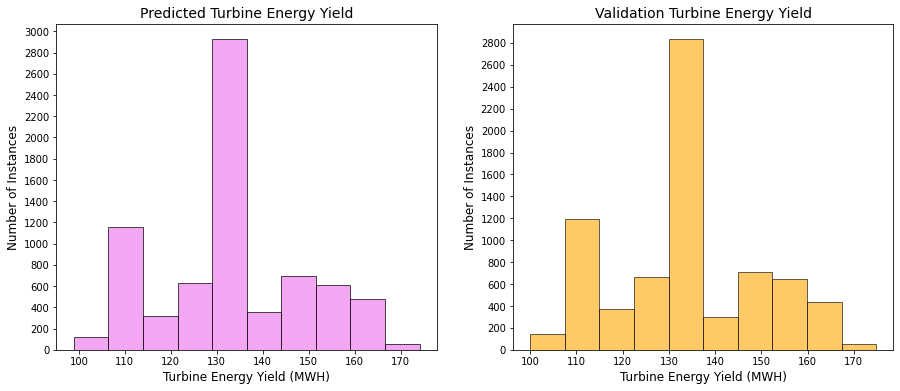

In [12]:
# Plot histogram for lr_pred
fig1 = plt.figure(figsize=(15, 6))
ax1 = fig1.add_subplot(1, 2, 1)
plt.xticks(np.arange(0, 200, 10))
plt.yticks(np.arange(0, 3200, 200))
plt.hist(x=lr_pred, facecolor='violet', alpha=0.7, edgecolor='black')
plt.xlabel('Turbine Energy Yield (MWH)', fontsize=12)
plt.ylabel('Number of Instances', fontsize=12)
plt.title('Predicted Turbine Energy Yield', fontsize=14)

# Plot histogram for y_test
ax1 = fig1.add_subplot(1, 2, 2)
plt.xticks(np.arange(0, 200, 10))
plt.yticks(np.arange(0, 3000, 200))
plt.hist(x=y_test, facecolor='orange', alpha=0.6, edgecolor='black')
plt.xlabel('Turbine Energy Yield (MWH)', fontsize=12)
plt.ylabel('Number of Instances', fontsize=12)
plt.title('Validation Turbine Energy Yield', fontsize=14)

# Show subplot
plt.show()


-- Fold: 1 --

R^2 Scoring:
Mean: 0.996262
Std: +/- 0.000029
Min: 0.996218
Max: 0.996310

RMSE Scoring:
Mean: 0.952213
Std: +/- 0.002375
Min: 0.946284
Max: 0.959027


-- Fold: 2 --

R^2 Scoring:
Mean: 0.996262
Std: +/- 0.000053
Min: 0.996155
Max: 0.996400

RMSE Scoring:
Mean: 0.952154
Std: +/- 0.005547
Min: 0.938573
Max: 0.963237


-- Fold: 3 --

R^2 Scoring:
Mean: 0.996262
Std: +/- 0.000060
Min: 0.996137
Max: 0.996407

RMSE Scoring:
Mean: 0.952132
Std: +/- 0.005477
Min: 0.941288
Max: 0.964618


-- Fold: 4 --

R^2 Scoring:
Mean: 0.996262
Std: +/- 0.000062
Min: 0.996128
Max: 0.996363

RMSE Scoring:
Mean: 0.952118
Std: +/- 0.005988
Min: 0.937296
Max: 0.968137


-- Fold: 5 --

R^2 Scoring:
Mean: 0.996261
Std: +/- 0.000095
Min: 0.996042
Max: 0.996466

RMSE Scoring:
Mean: 0.952097
Std: +/- 0.010064
Min: 0.928679
Max: 0.974792


-- Fold: 6 --

R^2 Scoring:
Mean: 0.996261
Std: +/- 0.000097
Min: 0.996000
Max: 0.996482

RMSE Scoring:
Mean: 0.952081
Std: +/- 0.010154
Min: 0.924502
Max: 0.974278

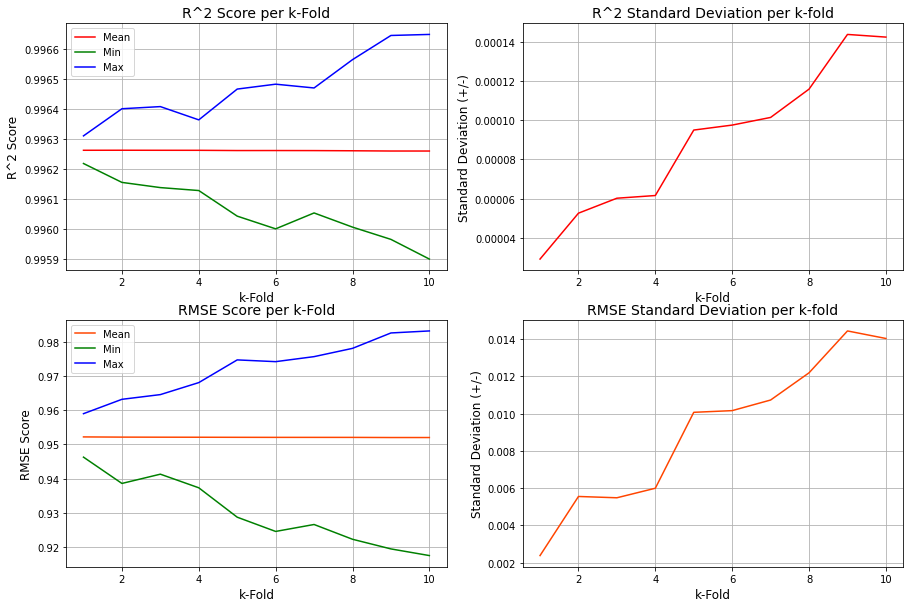

In [13]:
# Apply k-Fold Cross Validation on the training set

# Lists of values
r2_means, r2_stds, r2_mins, r2_maxs = [], [], [], []  # R^2 Scoring
rmse_means, rmse_stds, rmse_mins, rmse_maxs = [], [], [], []  # RMSE Scoring
# Cross validate for 10 k-folds, each with 3 repeats
for k in range(2, 12):
  cv = RepeatedKFold(n_splits = k, random_state = 0)
  r2_scores = cross_val_score(lr_reg, X_train, y_train, scoring='r2', cv=cv, n_jobs=-1)
  # scores = cross_val_score(lr_reg, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
  # scores = cross_val_score(lr_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
  rmse_scores = cross_val_score(lr_reg, X_train, y_train, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
  
  # Force scores to be positive
  r2_scores = abs(r2_scores)
  rmse_scores = abs(rmse_scores)

  # Print values
  print('')
  print('-- Fold: %d --' % (k-1))
  print('')
  print('R^2 Scoring:')
  print("Mean: %f" % (np.mean(r2_scores)))
  print("Std: +/- %f" % (np.std(r2_scores)))
  print("Min: %f" % (np.min(r2_scores)))
  print("Max: %f" % (np.max(r2_scores)))
  
  print('')
  print('RMSE Scoring:')
  print("Mean: %f" % (np.mean(rmse_scores)))
  print("Std: +/- %f" % (np.std(rmse_scores)))
  print("Min: %f" % (np.min(rmse_scores)))
  print("Max: %f" % (np.max(rmse_scores)))
  print('')
  
  # Append R^2 scores
  r2_means.append(np.mean(r2_scores))
  r2_stds.append(np.std(r2_scores))
  r2_mins.append(np.min(r2_scores))
  r2_maxs.append(np.max(r2_scores))
  
  # Append RMSE scores
  rmse_means.append(np.mean(rmse_scores))
  rmse_stds.append(np.std(rmse_scores))
  rmse_mins.append(np.min(rmse_scores))
  rmse_maxs.append(np.max(rmse_scores))

# Plot R^2 scores per k-fold:
fig2 = plt.figure(figsize=(15, 10))
ax1 = fig2.add_subplot(2, 2, 1)
ax1.plot(np.arange(1,11), r2_means, color='red', label='Mean')
ax1.plot(np.arange(1,11), r2_mins, color='green', label='Min')
ax1.plot(np.arange(1,11), r2_maxs, color='blue', label='Max')
ax1.set_xlabel('k-Fold', fontsize=12)
ax1.set_ylabel('R^2 Score', fontsize=12)
ax1.set_title('R^2 Score per k-Fold', fontsize=14)
ax1.legend()
ax1.grid(True)

# Plot R^2 Standard Deviations per k-fold:
ax2 = fig2.add_subplot(2, 2, 2)
ax2.plot(np.arange(1,11), r2_stds, color='red')
ax2.set_xlabel('k-Fold', fontsize=12)
ax2.set_ylabel('Standard Deviation (+/-)', fontsize=12)
ax2.set_title('R^2 Standard Deviation per k-fold', fontsize=14)
ax2.grid(True)

# Plot RMSE scores per k-fold:
ax3 = fig2.add_subplot(2, 2, 3)
ax3.plot(np.arange(1,11), rmse_means, color='orangered', label='Mean')
ax3.plot(np.arange(1,11), rmse_mins, color='green', label='Min')
ax3.plot(np.arange(1,11), rmse_maxs, color='blue', label='Max')
ax3.set_xlabel('k-Fold', fontsize=12)
ax3.set_ylabel('RMSE Score', fontsize=12)
ax3.set_title('RMSE Score per k-Fold', fontsize=14)
ax3.legend()
ax3.grid(True)

# Plot RMSE Standard Deviations per k-fold:
ax4 = fig2.add_subplot(2, 2, 4)
ax4.plot(np.arange(1,11), rmse_stds, color='orangered')
ax4.set_xlabel('k-Fold', fontsize=12)
ax4.set_ylabel('Standard Deviation (+/-)', fontsize=12)
ax4.set_title('RMSE Standard Deviation per k-fold', fontsize=14)
ax4.grid(True)

# Show subplot
plt.show()

<table border = "1">
  <thead>
    <th colspan = "3">Linear Regression Cross-Validation Results</th>
  </thead>
  <tbody>
    <tr>
      <td><b></b></td>
      <td><b>R^2</b></td>
      <td><b>RMSE</b></td>
    </tr>
    <tr>
      <td><b>Mean</b></td>
      <td>0.996</td>
      <td>0.952</td>
    </tr>
    <tr>
      <td><b>Std.</b></td>
      <td>0.0001</td>
      <td>0.014</td>
    </tr>
    <tr>
      <td><b>Min</b></td>
      <td>0.996</td>
      <td>0.917</td>
    </tr>
    <tr>
      <td><b>Max</b></td>
      <td>0.997</td>
      <td>0.983</td>
    </tr>
  </tbody>
</table>

### Decision Tree (DT)

In [14]:
dt_reg = DecisionTreeRegressor(criterion='mse', max_depth=94, 
                               min_samples_leaf=6, min_samples_split=11, 
                               max_features=10, random_state=0)

dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=94,
                      max_features=10, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=6, min_samples_split=11,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [15]:
# Predict test set results
dt_pred = dt_reg.predict(X_test)
np.set_printoptions(precision = 2)
print(np.concatenate((dt_pred.reshape(len(dt_pred), 1), y_test.reshape(len(y_test), 1)), 1 ))
print('')

# Summarize results
print('MAE: %.3f' % (mean_absolute_error(y_test, dt_pred)))
print('MSE: %.3f' % (mean_squared_error(y_test, dt_pred)))
print('RMSE: %.3f' % (mean_squared_error(y_test, dt_pred, squared=False)))
print('R^2 Score: %.3f' % (r2_score(y_test, dt_pred)))

[[126.98 126.81]
 [122.78 122.67]
 [152.33 152.8 ]
 ...
 [130.22 132.22]
 [133.35 132.83]
 [150.29 150.23]]

MAE: 0.649
MSE: 0.803
RMSE: 0.896
R^2 Score: 0.997


<table border = "1">
  <thead>
    <th colspan = "5">Decision Tree Prediction Scores</th>
  </thead>
  <tbody>
    <tr>
      <td><b>MAE:<b></td>
      <td>0.649</td>
    </tr>
    <tr>
      <td><b>MSE:<b></td>
      <td>0.803</td>
    </tr>
    <tr>
      <td><b>RMSE:<b></td>
      <td>0.896</td>
    </tr>
    <tr>
      <td><b>R^2:<b></td>
      <td>0.997</td>
    </tr>
  </tbody>
</table>

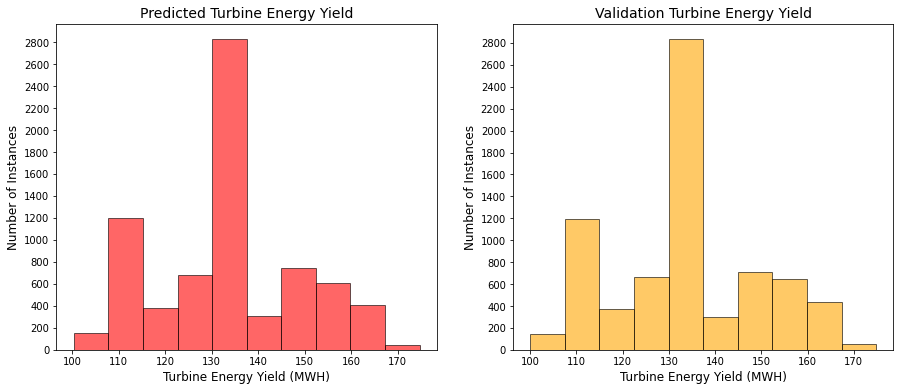

In [16]:
# Plot histogram for dt_pred
fig1 = plt.figure(figsize=(15, 6))
ax1 = fig1.add_subplot(1, 2, 1)
plt.xticks(np.arange(0, 200, 10))
plt.yticks(np.arange(0, 3200, 200))
plt.hist(x=dt_pred, facecolor='red', alpha=0.6, edgecolor='black')
plt.xlabel('Turbine Energy Yield (MWH)', fontsize=12)
plt.ylabel('Number of Instances', fontsize=12)
plt.title('Predicted Turbine Energy Yield', fontsize=14)

# Plot histogram for y_test
ax1 = fig1.add_subplot(1, 2, 2)
plt.xticks(np.arange(0, 200, 10))
plt.yticks(np.arange(0, 3000, 200))
plt.hist(x=y_test, facecolor='orange', alpha=0.6, edgecolor='black')
plt.xlabel('Turbine Energy Yield (MWH)', fontsize=12)
plt.ylabel('Number of Instances', fontsize=12)
plt.title('Validation Turbine Energy Yield', fontsize=14)

# Show subplot
plt.show()


-- Fold: 1 --

R^2 Scoring:
Mean: 0.996039
Std: +/- 0.000120
Min: 0.995786
Max: 0.996282

RMSE Scoring:
Mean: 0.980098
Std: +/- 0.013486
Min: 0.947029
Max: 1.003636


-- Fold: 2 --

R^2 Scoring:
Mean: 0.996409
Std: +/- 0.000073
Min: 0.996230
Max: 0.996577

RMSE Scoring:
Mean: 0.933204
Std: +/- 0.009271
Min: 0.914368
Max: 0.952053


-- Fold: 3 --

R^2 Scoring:
Mean: 0.996509
Std: +/- 0.000126
Min: 0.996180
Max: 0.996757

RMSE Scoring:
Mean: 0.919944
Std: +/- 0.016147
Min: 0.879704
Max: 0.959577


-- Fold: 4 --

R^2 Scoring:
Mean: 0.996593
Std: +/- 0.000122
Min: 0.996317
Max: 0.996894

RMSE Scoring:
Mean: 0.908802
Std: +/- 0.015379
Min: 0.882217
Max: 0.935893


-- Fold: 5 --

R^2 Scoring:
Mean: 0.996643
Std: +/- 0.000125
Min: 0.996406
Max: 0.997058

RMSE Scoring:
Mean: 0.902087
Std: +/- 0.015488
Min: 0.852967
Max: 0.940192


-- Fold: 6 --

R^2 Scoring:
Mean: 0.996660
Std: +/- 0.000132
Min: 0.996244
Max: 0.996891

RMSE Scoring:
Mean: 0.899776
Std: +/- 0.018582
Min: 0.865426
Max: 0.945979

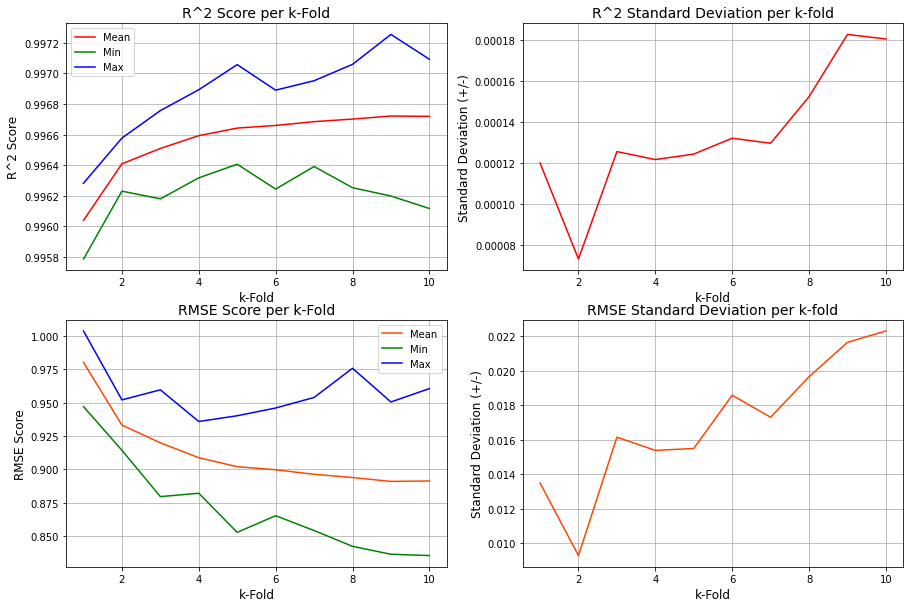

In [17]:
# Apply k-Fold Cross Validation on the training set

# Lists of values
r2_means, r2_stds, r2_mins, r2_maxs = [], [], [], []  # R^2 Scoring
rmse_means, rmse_stds, rmse_mins, rmse_maxs = [], [], [], []  # RMSE Scoring
# Cross validate for 10 k-folds, each with 3 repeats
for k in range(2, 12):
  cv = RepeatedKFold(n_splits = k, random_state = 0)
  r2_scores = cross_val_score(dt_reg, X_train, y_train, scoring='r2', cv=cv, n_jobs=-1)
  # scores = cross_val_score(reg, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
  # scores = cross_val_score(reg, X_train, y_train, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
  rmse_scores = cross_val_score(dt_reg, X_train, y_train, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
  
  # Force scores to be positive
  r2_scores = abs(r2_scores)
  rmse_scores = abs(rmse_scores)

  # Print values
  print('')
  print('-- Fold: %d --' % (k-1))
  print('')
  print('R^2 Scoring:')
  print("Mean: %f" % (np.mean(r2_scores)))
  print("Std: +/- %f" % (np.std(r2_scores)))
  print("Min: %f" % (np.min(r2_scores)))
  print("Max: %f" % (np.max(r2_scores)))
  
  print('')
  print('RMSE Scoring:')
  print("Mean: %f" % (np.mean(rmse_scores)))
  print("Std: +/- %f" % (np.std(rmse_scores)))
  print("Min: %f" % (np.min(rmse_scores)))
  print("Max: %f" % (np.max(rmse_scores)))
  print('')
  
  # Append R^2 scores
  r2_means.append(np.mean(r2_scores))
  r2_stds.append(np.std(r2_scores))
  r2_mins.append(np.min(r2_scores))
  r2_maxs.append(np.max(r2_scores))
  
  # Append RMSE scores
  rmse_means.append(np.mean(rmse_scores))
  rmse_stds.append(np.std(rmse_scores))
  rmse_mins.append(np.min(rmse_scores))
  rmse_maxs.append(np.max(rmse_scores))

# Plot R^2 scores per k-fold:
fig2 = plt.figure(figsize=(15, 10))
ax1 = fig2.add_subplot(2, 2, 1)
ax1.plot(np.arange(1,11), r2_means, color='red', label='Mean')
ax1.plot(np.arange(1,11), r2_mins, color='green', label='Min')
ax1.plot(np.arange(1,11), r2_maxs, color='blue', label='Max')
ax1.set_xlabel('k-Fold', fontsize=12)
ax1.set_ylabel('R^2 Score', fontsize=12)
ax1.set_title('R^2 Score per k-Fold', fontsize=14)
ax1.legend()
ax1.grid(True)

# Plot R^2 Standard Deviations per k-fold:
ax2 = fig2.add_subplot(2, 2, 2)
ax2.plot(np.arange(1,11), r2_stds, color='red')
ax2.set_xlabel('k-Fold', fontsize=12)
ax2.set_ylabel('Standard Deviation (+/-)', fontsize=12)
ax2.set_title('R^2 Standard Deviation per k-fold', fontsize=14)
ax2.grid(True)

# Plot RMSE scores per k-fold:
ax3 = fig2.add_subplot(2, 2, 3)
ax3.plot(np.arange(1,11), rmse_means, color='orangered', label='Mean')
ax3.plot(np.arange(1,11), rmse_mins, color='green', label='Min')
ax3.plot(np.arange(1,11), rmse_maxs, color='blue', label='Max')
ax3.set_xlabel('k-Fold', fontsize=12)
ax3.set_ylabel('RMSE Score', fontsize=12)
ax3.set_title('RMSE Score per k-Fold', fontsize=14)
ax3.legend()
ax3.grid(True)

# Plot RMSE Standard Deviations per k-fold:
ax4 = fig2.add_subplot(2, 2, 4)
ax4.plot(np.arange(1,11), rmse_stds, color='orangered')
ax4.set_xlabel('k-Fold', fontsize=12)
ax4.set_ylabel('Standard Deviation (+/-)', fontsize=12)
ax4.set_title('RMSE Standard Deviation per k-fold', fontsize=14)
ax4.grid(True)

# Show subplot
plt.show()

<table border = "1">
  <thead>
    <th colspan = "3">Decision Tree Cross-Validation Results</th>
  </thead>
  <tbody>
    <tr>
      <td><b></b></td>
      <td><b>R^2</b></td>
      <td><b>RMSE</b></td>
    </tr>
    <tr>
      <td><b>Mean</b></td>
      <td>0.997</td>
      <td>0.891</td>
    </tr>
    <tr>
      <td><b>Std.</b></td>
      <td>0.0002</td>
      <td>0.022</td>
    </tr>
    <tr>
      <td><b>Min</b></td>
      <td>0.996</td>
      <td>0.836</td>
    </tr>
    <tr>
      <td><b>Max</b></td>
      <td>0.997</td>
      <td>0.961</td>
    </tr>
  </tbody>
</table>

In [18]:
# Apply Grid Search for parameter tuning

# dt_params = {'criterion': ['mse', 'mae'],
#              'max_depth': [10, 25, 50, 75, 100],
#              'min_samples_leaf': [2, 5, 8, 10],
#              'min_samples_split': [2, 5, 8, 10],
#              'max_features': [2, 5, 10, 15, 20, 25],
#              'random_state': [0, 1, 2, 42]}

dt_params = {'criterion': ['mse'],
             'max_depth': [94],
             'min_samples_leaf': [6],
             'min_samples_split': [11],
             'max_features': [10],
             'random_state': [0]}

# dt_grid = GridSearchCV(dt_reg, dt_params, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# dt_grid = GridSearchCV(dt_reg, dt_params, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
# dt_grid = GridSearchCV(dt_reg, dt_params, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
dt_grid = GridSearchCV(dt_reg, dt_params, scoring='r2', cv=cv, n_jobs=-1)
results = dt_grid.fit(X_train, y_train)

# Summarize results
best_score = dt_grid.best_score_
best_parameters = dt_grid.best_params_
print("Best Score: %.3f%%" % (np.abs(best_score * 100)))  # R^2 Scoring
# print("Best Score: %.3f" % (np.abs(best_score)))  # RMSE
print("Best Parameters: ", best_parameters)

Best Score: 99.672%
Best Parameters:  {'criterion': 'mse', 'max_depth': 94, 'max_features': 10, 'min_samples_leaf': 6, 'min_samples_split': 11, 'random_state': 0}


<table border = "1">
  <thead>
    <th colspan = "2">Decision Tree Grid Search Results</th>
  </thead>
  <tbody>
    <tr>
      <td><b>Best Score</b></td>
      <td>99.672%</td>
    </tr>
    <tr>
      <td colspan="2"><b>Best Parameters:</b></td>
    </tr>
    <tr>
      <td><b>criterion</b></td>
      <td>'mse'</td>
    </tr>
    <tr>
      <td><b>max_depth</b></td>
      <td>94</td>
    </tr>
    <tr>
      <td><b>max_features</b></td>
      <td>10</td>
    </tr>
    <tr>
      <td><b>min_samples_leaf</b></td>
      <td>6</td>
    </tr>
    <tr>
      <td><b>min_samples_split</b></td>
      <td>11</td>
    </tr>
    <tr>
      <td><b>random_state</b></td>
      <td>0</td>
    </tr>
  </tbody>
</table>

### LightGBM (LGB)

In [19]:
lgb_reg = LGBMRegressor(max_depth=19, n_estimators=100, learning_rate=0.1, 
                        reg_alpha=0.5, reg_lambda=0.45, random_state=0)

lgb_reg.fit(X_train, y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=19,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=0, reg_alpha=0.5, reg_lambda=0.45, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [20]:
# Predict test set results
lgb_pred = lgb_reg.predict(X_test)
np.set_printoptions(precision = 2)
print(np.concatenate((lgb_pred.reshape(len(lgb_pred), 1), y_test.reshape(len(y_test), 1)), 1 ))
print('')

# Summarize results
print('MAE: %.3f' % (mean_absolute_error(y_test, lgb_pred)))
print('MSE: %.3f' % (mean_squared_error(y_test, lgb_pred)))
print('RMSE: %.3f' % (mean_squared_error(y_test, lgb_pred, squared=False)))
print('R^2 Score: %.3f' % (r2_score(y_test, lgb_pred)))

[[126.76 126.81]
 [121.9  122.67]
 [151.55 152.8 ]
 ...
 [132.47 132.22]
 [133.43 132.83]
 [149.92 150.23]]

MAE: 0.577
MSE: 0.580
RMSE: 0.761
R^2 Score: 0.998


<table border = "1">
  <thead>
    <th colspan = "5">LightGBM Prediction Scores</th>
  </thead>
  <tbody>
    <tr>
      <td><b>MAE:<b></td>
      <td>0.577</td>
    </tr>
    <tr>
      <td><b>MSE:<b></td>
      <td>0.580</td>
    </tr>
    <tr>
      <td><b>RMSE:<b></td>
      <td>0.761</td>
    </tr>
    <tr>
      <td><b>R^2:<b></td>
      <td>0.998</td>
    </tr>
  </tbody>
</table>

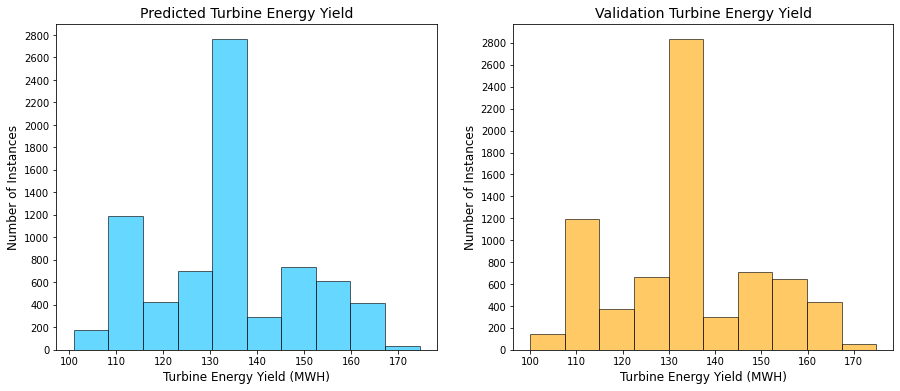

In [21]:
# Plot histogram for lgb_pred
fig1 = plt.figure(figsize=(15, 6))
ax1 = fig1.add_subplot(1, 2, 1)
plt.xticks(np.arange(0, 200, 10))
plt.yticks(np.arange(0, 3000, 200))
plt.hist(x=lgb_pred, facecolor='deepskyblue', alpha=0.6, edgecolor='black')
plt.xlabel('Turbine Energy Yield (MWH)', fontsize=12)
plt.ylabel('Number of Instances', fontsize=12)
plt.title('Predicted Turbine Energy Yield', fontsize=14)

# Plot histogram for y_test
ax1 = fig1.add_subplot(1, 2, 2)
plt.xticks(np.arange(0, 200, 10))
plt.yticks(np.arange(0, 3000, 200))
plt.hist(x=y_test, facecolor='orange', alpha=0.6, edgecolor='black')
plt.xlabel('Turbine Energy Yield (MWH)', fontsize=12)
plt.ylabel('Number of Instances', fontsize=12)
plt.title('Validation Turbine Energy Yield', fontsize=14)

# Show subplot
plt.show()


-- Fold: 1 --

R^2 Scoring:
Mean: 0.997810
Std: +/- 0.000040
Min: 0.997694
Max: 0.997885

RMSE Scoring:
Mean: 0.728824
Std: +/- 0.006453
Min: 0.713996
Max: 0.742410


-- Fold: 2 --

R^2 Scoring:
Mean: 0.997883
Std: +/- 0.000041
Min: 0.997793
Max: 0.997958

RMSE Scoring:
Mean: 0.716486
Std: +/- 0.007293
Min: 0.697914
Max: 0.728183


-- Fold: 3 --

R^2 Scoring:
Mean: 0.997901
Std: +/- 0.000044
Min: 0.997830
Max: 0.998000

RMSE Scoring:
Mean: 0.713445
Std: +/- 0.007408
Min: 0.697265
Max: 0.729206


-- Fold: 4 --

R^2 Scoring:
Mean: 0.997914
Std: +/- 0.000055
Min: 0.997794
Max: 0.998029

RMSE Scoring:
Mean: 0.711191
Std: +/- 0.009286
Min: 0.693907
Max: 0.731207


-- Fold: 5 --

R^2 Scoring:
Mean: 0.997917
Std: +/- 0.000059
Min: 0.997793
Max: 0.998095

RMSE Scoring:
Mean: 0.710600
Std: +/- 0.009604
Min: 0.689415
Max: 0.737821


-- Fold: 6 --

R^2 Scoring:
Mean: 0.997928
Std: +/- 0.000068
Min: 0.997764
Max: 0.998107

RMSE Scoring:
Mean: 0.708707
Std: +/- 0.011455
Min: 0.678848
Max: 0.743496

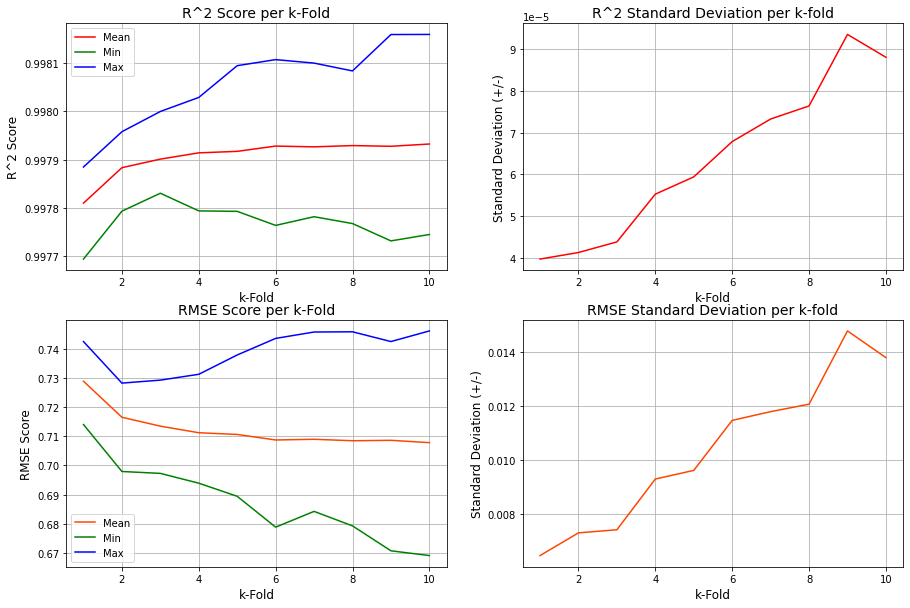

In [22]:
# Apply k-Fold Cross Validation on the training set

# Lists of values
r2_means, r2_stds, r2_mins, r2_maxs = [], [], [], []  # R^2 Scoring
rmse_means, rmse_stds, rmse_mins, rmse_maxs = [], [], [], []  # RMSE Scoring
# Cross validate for 10 k-folds, each with 3 repeats
for k in range(2, 12):
  cv = RepeatedKFold(n_splits = k, random_state = 0)
  r2_scores = cross_val_score(lgb_reg, X_train, y_train, scoring='r2', cv=cv, n_jobs=-1)
  # scores = cross_val_score(lgb_pred, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
  # scores = cross_val_score(lgb_pred, X_train, y_train, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
  rmse_scores = cross_val_score(lgb_reg, X_train, y_train, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
  
  # Force scores to be positive
  r2_scores = abs(r2_scores)
  rmse_scores = abs(rmse_scores)

  # Print values
  print('')
  print('-- Fold: %d --' % (k-1))
  print('')
  print('R^2 Scoring:')
  print("Mean: %f" % (np.mean(r2_scores)))
  print("Std: +/- %f" % (np.std(r2_scores)))
  print("Min: %f" % (np.min(r2_scores)))
  print("Max: %f" % (np.max(r2_scores)))
  
  print('')
  print('RMSE Scoring:')
  print("Mean: %f" % (np.mean(rmse_scores)))
  print("Std: +/- %f" % (np.std(rmse_scores)))
  print("Min: %f" % (np.min(rmse_scores)))
  print("Max: %f" % (np.max(rmse_scores)))
  print('')
  
  # Append R^2 scores
  r2_means.append(np.mean(r2_scores))
  r2_stds.append(np.std(r2_scores))
  r2_mins.append(np.min(r2_scores))
  r2_maxs.append(np.max(r2_scores))
  
  # Append RMSE scores
  rmse_means.append(np.mean(rmse_scores))
  rmse_stds.append(np.std(rmse_scores))
  rmse_mins.append(np.min(rmse_scores))
  rmse_maxs.append(np.max(rmse_scores))

# Plot R^2 scores per k-fold:
fig2 = plt.figure(figsize=(15, 10))
ax1 = fig2.add_subplot(2, 2, 1)
ax1.plot(np.arange(1,11), r2_means, color='red', label='Mean')
ax1.plot(np.arange(1,11), r2_mins, color='green', label='Min')
ax1.plot(np.arange(1,11), r2_maxs, color='blue', label='Max')
ax1.set_xlabel('k-Fold', fontsize=12)
ax1.set_ylabel('R^2 Score', fontsize=12)
ax1.set_title('R^2 Score per k-Fold', fontsize=14)
ax1.legend()
ax1.grid(True)

# Plot R^2 Standard Deviations per k-fold:
ax2 = fig2.add_subplot(2, 2, 2)
ax2.plot(np.arange(1,11), r2_stds, color='red')
ax2.set_xlabel('k-Fold', fontsize=12)
ax2.set_ylabel('Standard Deviation (+/-)', fontsize=12)
ax2.set_title('R^2 Standard Deviation per k-fold', fontsize=14)
ax2.grid(True)

# Plot RMSE scores per k-fold:
ax3 = fig2.add_subplot(2, 2, 3)
ax3.plot(np.arange(1,11), rmse_means, color='orangered', label='Mean')
ax3.plot(np.arange(1,11), rmse_mins, color='green', label='Min')
ax3.plot(np.arange(1,11), rmse_maxs, color='blue', label='Max')
ax3.set_xlabel('k-Fold', fontsize=12)
ax3.set_ylabel('RMSE Score', fontsize=12)
ax3.set_title('RMSE Score per k-Fold', fontsize=14)
ax3.legend()
ax3.grid(True)

# Plot RMSE Standard Deviations per k-fold:
ax4 = fig2.add_subplot(2, 2, 4)
ax4.plot(np.arange(1,11), rmse_stds, color='orangered')
ax4.set_xlabel('k-Fold', fontsize=12)
ax4.set_ylabel('Standard Deviation (+/-)', fontsize=12)
ax4.set_title('RMSE Standard Deviation per k-fold', fontsize=14)
ax4.grid(True)

# Show subplot
plt.show()

<table border = "1">
  <thead>
    <th colspan = "3">LightGBM Cross-Validation Results</th>
  </thead>
  <tbody>
    <tr>
      <td><b></b></td>
      <td><b>R^2</b></td>
      <td><b>RMSE</b></td>
    </tr>
    <tr>
      <td><b>Mean</b></td>
      <td>0.998</td>
      <td>0.708</td>
    </tr>
    <tr>
      <td><b>Std.</b></td>
      <td>0.0001</td>
      <td>0.014</td>
    </tr>
    <tr>
      <td><b>Min</b></td>
      <td>0.998</td>
      <td>0.669</td>
    </tr>
    <tr>
      <td><b>Max</b></td>
      <td>0.998</td>
      <td>0.746</td>
    </tr>
  </tbody>
</table>

In [23]:
# Apply Grid Search for parameter tuning

# param_dict = {'max_depth': [10, 25, 50, 75, 100],
#               'n_estimators': [50, 100, 150, 200, 250],
#               'learning_rate': [0.01, 0.05, 0.1, 0.15],
#               'colsample_bytree': [0.2, 0.4, 0.6, 0.8, 1],
#               'num_leaves': [1, 5, 10, 20],
#               'min_split_gain': [2, 5, 10],
#               'reg_alpha': [0.5, 1, 1.5, 2, 5, 10],
#               'reg_lambda': [0.5, 1, 1.5, 2, 5, 10],
#               'subsample': [1, 1.5, 2, 5, 10],
#               'subsample_freq': [5, 10, 15, 20, 25],
#               'random_state': [0, 1, 2, 5, 42]}

lgb_params = {'max_depth': [19],
              'n_estimators': [100],
              'learning_rate': [0.1],
              'reg_alpha': [0.5],
              'reg_lambda': [0.45],
              'random_state': [0]}

# lgb_grid = GridSearchCV(lgb_reg, param_dict, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# lgb_grid = GridSearchCV(lgb_reg, param_dict, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
# lgb_grid = GridSearchCV(lgb_reg, param_dict, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
lgb_grid = GridSearchCV(lgb_reg, lgb_params, scoring='r2', cv=cv, n_jobs=-1)
results = lgb_grid.fit(X_train, y_train)

# Summarize results
best_score = lgb_grid.best_score_
best_parameters = lgb_grid.best_params_
print("Best Score: %.3f%%" % (np.abs(best_score * 100)))  # R^2 Scoring
# print("Best Score: %.3f" % (np.abs(best_score)))  # RMSE
print("Best Parameters: ", best_parameters)

Best Score: 99.793%
Best Parameters:  {'learning_rate': 0.1, 'max_depth': 19, 'n_estimators': 100, 'random_state': 0, 'reg_alpha': 0.5, 'reg_lambda': 0.45}


<table border = "1">
  <thead>
    <th colspan = "2">LightGBM Grid Search Results</th>
  </thead>
  <tbody>
    <tr>
      <td><b>Best Score</b></td>
      <td>99.793%</td>
    </tr>
    <tr>
      <td colspan="2"><b>Best Parameters:</b></td>
    </tr>
    <tr>
      <td><b>learning_rate</b></td>
      <td>0.1 (default)</td>
    </tr>
    <tr>
      <td><b>max_depth</b></td>
      <td>19</td>
    </tr>
    <tr>
      <td><b>n_estimators</b></td>
      <td>100 (default)</td>
    </tr>
    <tr>
      <td><b>random_state</b></td>
      <td>0</td>
    </tr>
    <tr>
      <td><b>reg_alpha</b></td>
      <td>0.5</td>
    </tr>
    <tr>
      <td><b>reg_lambda</b></td>
      <td>0.45</td>
    </tr>
  </tbody>
</table>

## 5. Final Results

<table border = "1">
  <thead>
    <th colspan = "5">Final Regression Scores</th>
  </thead>
  <tbody>
    <tr>
      <td><b>Model</b></td>
      <td colspan='2'><b>R^2</b></td>
      <td colspan='2'><b>RMSE</b></td>
    </tr>
    <tr>
      <td><b></b></td>
      <td><b>CV</b></td>
      <td><b>Val.</b></td>
      <td><b>CV</b></td>
      <td><b>Val.</b></td>
    </tr> 
    <tr>
      <td><b>Linear Regression (LR)</b></td>
      <td>0.996</td>
      <td>0.996</td>
      <td>0.952</td>
      <td>1.000</td>
    </tr>
    <tr>
      <td><b>Decision Tree (DT)</b></td>
      <td>0.997</td>
      <td>0.997</td>
      <td>0.891</td>
      <td>0.896</td>
    </tr>
    <tr>
      <td><b>LightGBM (LGB)</b></td>
      <td>0.998</td>
      <td>0.998</td>
      <td>0.708</td>
      <td>0.761</td>
    </tr>
  </tbody>
</table>